In [1]:
%pip install -q matplotlib sympy numpy opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
accel_data = np.loadtxt('accelerometer.csv', delimiter=',',skiprows=1)

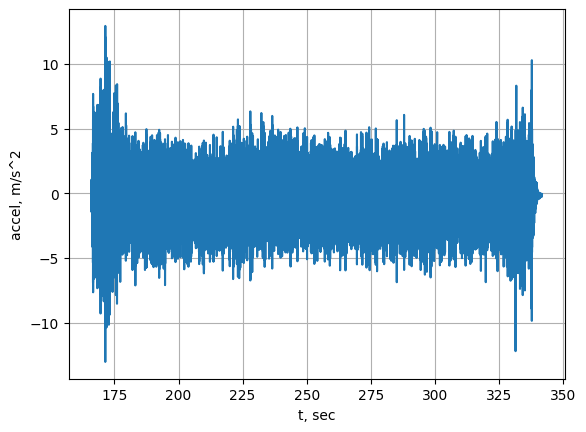

In [4]:
plt.plot(accel_data[:, 0], accel_data[:, 1])
plt.xlabel('t, sec')
plt.ylabel('accel, m/s^2')
plt.grid()

In [5]:
time = accel_data[:,0]
accel = accel_data[:,1]

ak = np.fft.ifft(accel)
power = abs(ak)**2
dt = np.mean(np.diff(time))
nu = len(time)
freq = np.fft.fftfreq(nu, dt)

index10 = 0
a = 0

while a != 10:
    index10+=1
    a = freq[index10]//1

b = 0
index80 = 0

while b != 80:
    index80+=1
    b = freq[index80]//1

Dominant Frequency: 51.95950748918213 Hz


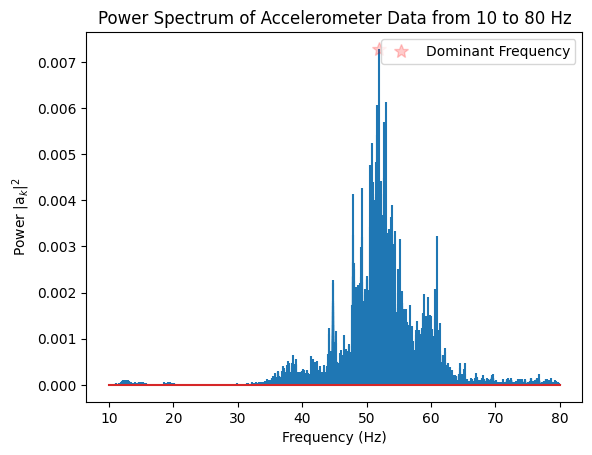

In [6]:
plt.figure()
plt.stem(freq[index10:index80],power[index10:index80], markerfmt = ' ')
plt.title("Power Spectrum of Accelerometer Data from 10 to 80 Hz")
plt.ylabel("Power |a$_k$|$^2$")
plt.xlabel("Frequency (Hz)")

indexMax = index10 + np.argmax(power[index10:index80])
plt.plot(freq[indexMax], power[indexMax], 'r*', markersize=10, alpha=0.2, label='Dominant Frequency')
plt.legend()

print('Dominant Frequency:', freq[indexMax], 'Hz')

(np.float64(10.0), np.float64(80.0), np.float64(0.0), np.float64(0.008))

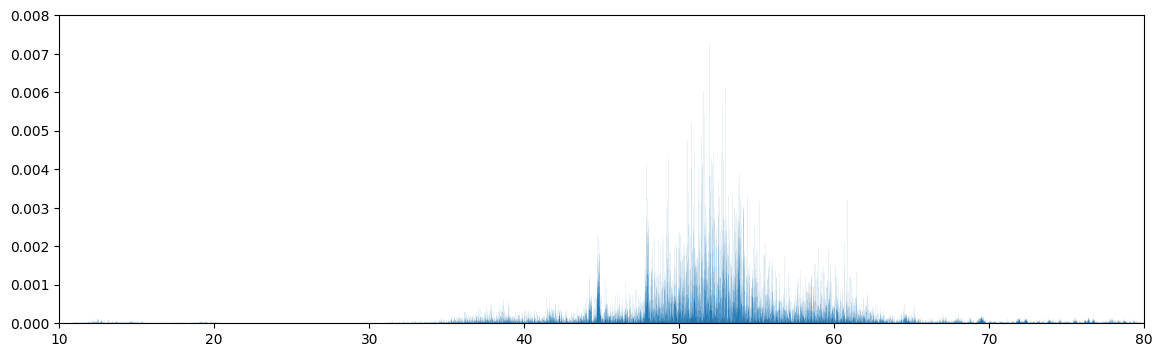

In [7]:
plt.figure(figsize=(14, 4))
plt.fill_between(freq[index10:index80],power[index10:index80], step='pre')
plt.axis([10, 80, 0, 0.008])

<StemContainer object of 3 artists>

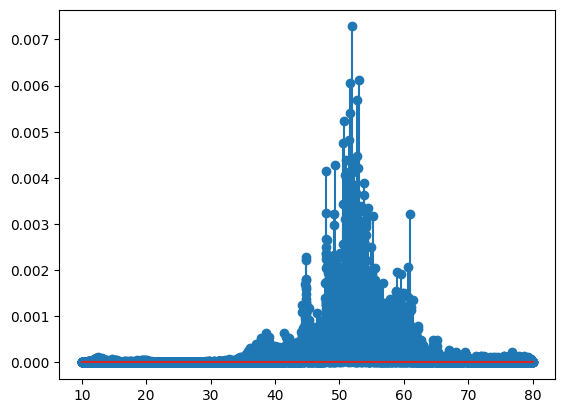

In [8]:
plt.stem(freq[index10:index80],power[index10:index80])

### Problem 2b

In [9]:
# accel_data = np.loadtxt('moon.csv', delimiter=',',skiprows=1)
# days = moon_data[:,0]
# dist = moon_data[:,1]

# ak_moon = ifft(dist)
# power_moon = abs(ak_moon)**2
# dt_moon = mean(diff(days))
# nu_moon = len(days)
# freq_moon = fftfreq(nu_moon, dt_moon)

# figure()
# plot(days,dist)
# axis([0, 366, 0.00235, 0.00275])
# title("Distance of the Moon from the Earth in 2020")
# ylabel("Distance (AU)")
# xlabel("Time (Days)")

# figure()
# stem(freq_moon,power_moon, markerfmt = ' ')
# title("Unaltered Power Spectrum of Moon Distance Data")
# ylabel("Power |a$_k$|$^2$")
# xlabel("Frequency (Cycles/Day)");

# figure()
# stem(freq_moon[1:nu_moon//2],power_moon[1:nu_moon//2], markerfmt = ' ')
# title("Power Spectrum of Moon Distance Data (Without a$_0$)")
# ylabel("Power |a$_k$|$^2$")
# xlabel("Frequency (Cycles/Day)")

# indexMax_moon = 1 + argmax(power_moon[1:nu//2])
# plot(freq_moon[indexMax_moon], power_moon[indexMax_moon], 'r*', markersize=10, alpha=0.2, label='Dominant Frequency')
# legend()

# print('Dominant Frequency:', freq_moon[indexMax_moon], 'Cycles/Day')